In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import pandas as pd
from sklearn.datasets import load_iris
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# Fisher's iris data
## 전문 식물학자가 setosa, versicolor, virginica 종으로 분류한 붓꽃의 측정 데이터

In [2]:
iris = load_iris()
X = iris.data[:, [0,2]]
y = iris.target
print X.shape, y.shape

(150, 2) (150,)


Text(0,0.5,'Petal length')

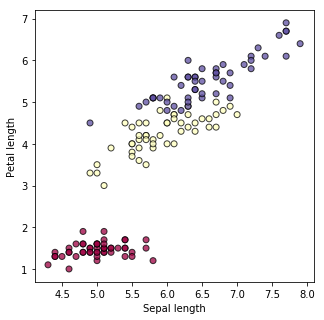

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=mpl.cm.Spectral, alpha=.75)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

# Softmax classifier

In [4]:
N = 150  # number of samples per class
D = 2    # feature dimension
K = 3    # number of classes

reg = 0.05  # regularization strength
eta = 0.05  # learning rate

# initialize weights (and bias)
W = np.random.randn(D, K) * 0.01
b = np.zeros(K)

# training process
losses = []
for epoch in range(1000):
    # construct linear decision function
    f = X.dot(W) + b
    
    # compute gradients (backpropagation / chain rule)
    p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
    I = np.zeros(p.shape)
    I[range(X.shape[0]), y] = 1
    df = (p - I) / X.shape[0]
    
    dW = (X.T).dot(df)
    dW += reg * W
    db = np.sum(df, axis=0)
    
    # update weights by gradient descent
    W -= eta * dW
    b -= eta * db
    
    # calculate and print loss
    data_loss = -np.sum(np.log(p[range(X.shape[0]), y])) / X.shape[0]
    reg_loss = np.sum(0.5 * reg * (W**2))
    loss = data_loss + reg_loss
    losses.append(loss)
    if epoch % 100 == 0:
        print "{}: loss={}".format(epoch, loss)



0: loss=1.09924663298
100: loss=0.602087643179
200: loss=0.562653547093
300: loss=0.551031895051
400: loss=0.545422212241
500: loss=0.541670795803
600: loss=0.538610389349
700: loss=0.535854532547
800: loss=0.533263491855
900: loss=0.530783263429


Text(0.5,0,'Epochs')

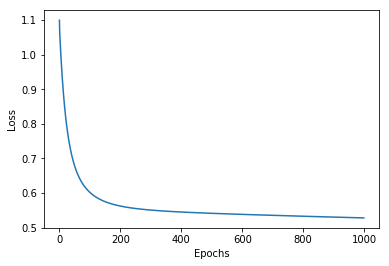

In [5]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [6]:
# prediction
pred = np.argmax(X.dot(W) + b, axis=1)
# accuracy
acc = (pred==y) / float(y.shape[0])
print "Accuracy:", sum(acc)

Accuracy: 0.9266666666666687


Text(0.5,1,'Decision hyperplane')

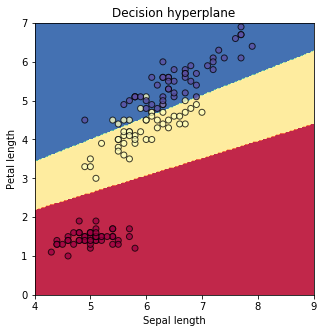

In [7]:
xx1, xx2 = np.meshgrid(np.linspace(4, 9, 200),
                       np.linspace(0, 7, 200))

test_data = np.c_[xx1.flatten(), xx2.flatten()]
test = np.argmax(test_data.dot(W) + b, axis=1)

plt.figure(figsize=(5,5))
plt.contourf(xx1, xx2, test.reshape(200, 200),
             cmap=mpl.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=mpl.cm.Spectral, alpha=.75)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.title("Decision hyperplane")

Text(0.5,1,'Weights')

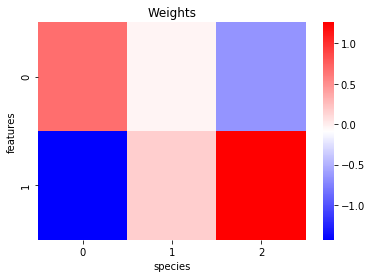

In [8]:
sns.heatmap(W, cmap=mpl.cm.bwr)
plt.xlabel("species")
plt.ylabel("features")
plt.title("Weights")